In [1]:
import numpy as np
import scipy.io as sio
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
training_files = os.listdir('../downloads/data4test/data/')
label_files = os.listdir("../downloads/data4test/label/")
training_files.sort()
label_files.sort()
high_index = len(training_files)
len(label_files), len(training_files)

(10800, 10800)

In [3]:
def visualize_random_image(training_files, label_files, aug_files, aug_labels):
    rand_ind = np.random.randint(high_index)
    mat_file_aug = sio.loadmat(file_name= f"../downloads/data4test/aug_data/{aug_files[rand_ind-1]}")
    label_img_aug = mpimg.imread(f"../downloads/data4test/aug_label/{aug_labels[rand_ind-1]}")
    mat_x_aug = mat_file_aug["vxSample"]
    mat_y_aug = mat_file_aug["vySample"]
    input_image_aug = np.stack((mat_x_aug, mat_y_aug, np.zeros(mat_x_aug.shape)), -1)
    # not-augmented data
    mat_file = sio.loadmat(file_name= f"../downloads/data4test/data/{training_files[rand_ind]}")
    label_img = mpimg.imread(f"../downloads/data4test/label/{label_files[rand_ind]}")
    mat_x = mat_file["vxSample"]
    mat_y = mat_file["vySample"]
    input_image = np.stack((mat_x, mat_y, np.zeros(mat_x.shape)), -1)
    print(f"data:{training_files[rand_ind]}")
    print(f"label:{label_files[rand_ind]}")
    print(f"aug data:{aug_files[rand_ind]}")
    print(f"aug labels:{aug_labels[rand_ind]}")
    fig = plt.figure(figsize=(15, 10))
    rows = 2
    columns = 2
    fig.add_subplot(rows, columns, 1)
    plt.imshow(input_image)
    plt.axis(False)
    plt.title("Data")
    fig.add_subplot(rows, columns, 2)
    plt.imshow(label_img)
    plt.axis(False)
    plt.title("Label")
    fig.add_subplot(rows, columns, 3)
    plt.imshow(input_image_aug)
    plt.title("Aug Data")
    plt.axis(False)
    fig.add_subplot(rows, columns, 4)
    plt.title("Aug Label")
    plt.imshow(label_img_aug)



In [4]:
augmented_data = os.listdir("../downloads/data4test/aug_data/")
augmented_label = os.listdir("../downloads/data4test/aug_label/")
augmented_data.sort()
augmented_label.sort()
#visualize_random_image(training_files=training_files, label_files=label_files, aug_labels=augmented_label, aug_files=augmented_data)
len(augmented_data), len(augmented_label)

(10800, 10800)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


data:6_31_201_244.mat
label:6_31_201_244.png
aug data:6_31_201_244_aug.mat
aug labels:6_31_201_244_aug.png


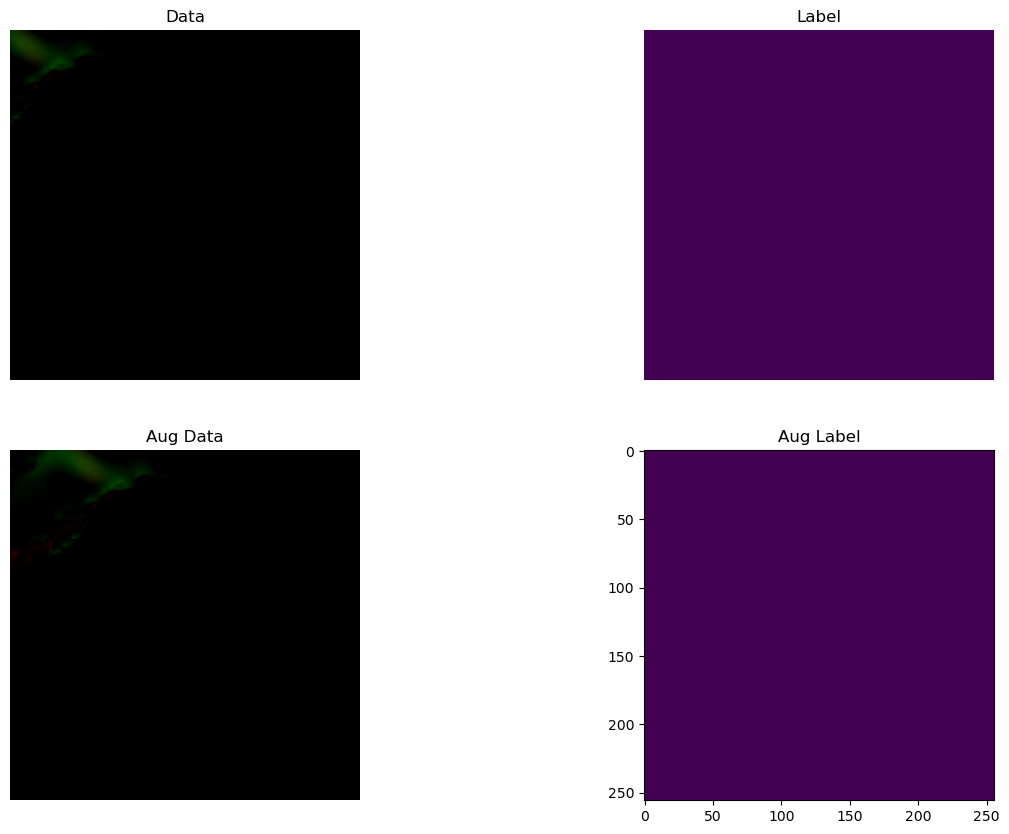

In [5]:
visualize_random_image(training_files=training_files, label_files=label_files, aug_labels=augmented_label, aug_files=augmented_data)

In [6]:
augmented_data.sort()
training_files.sort()
augmented_data[1], training_files[1]

('3_10_101_151_aug.mat', '3_10_101_101.mat')

In [15]:
rand_ind = np.random.randint(high_index)
mat_file_aug = sio.loadmat(file_name= f"../downloads/data4test/aug_data/{augmented_data[rand_ind-1]}")
label_img_aug = mpimg.imread(f"../downloads/data4test/aug_label/{augmented_label[rand_ind-1]}")
mat_x_aug = mat_file_aug["vxSample"]
mat_x_aug.shape
mat_y_aug = mat_file_aug["vySample"]

array([[ 0.09074832,  0.03055919, -0.01624431, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10139249,  0.03852088, -0.0090056 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08912693,  0.03701255, -0.00584084, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

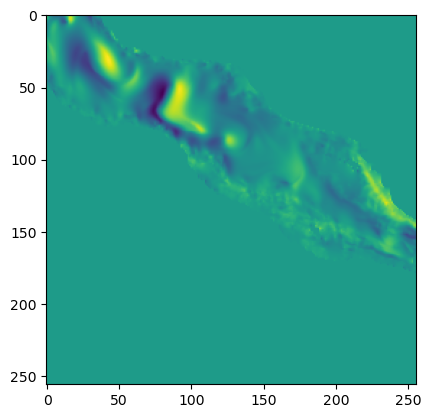

In [36]:
plt.imshow(mat_x_aug)
mat_x_aug

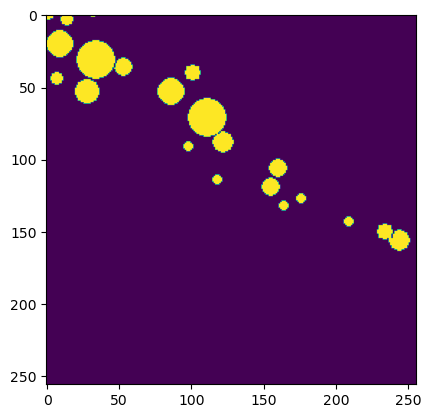

In [35]:
plt.imshow(label_img_aug)

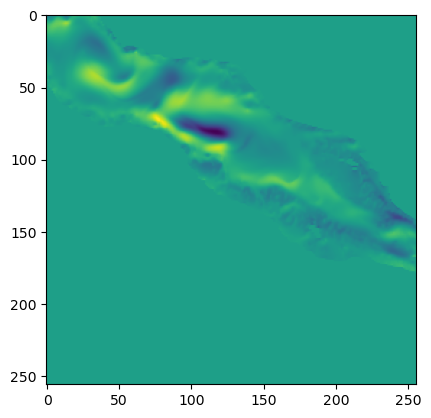

In [17]:
plt.imshow(mat_y_aug)

In [104]:
#tans of every vectors in order to keep directions
directions = mat_y_aug / mat_x_aug
for i in range(mat_y_aug.shape[0]):
    for j in range(mat_x_aug.shape[0]):
        if np.isnan(directions[i][j]):
            directions[i][j] = 1
directions


/tmp/ipykernel_148990/2006093671.py:2: RuntimeWarning: divide by zero encountered in divide
  directions = mat_y_aug / mat_x_aug
/tmp/ipykernel_148990/2006093671.py:2: RuntimeWarning: invalid value encountered in divide
  directions = mat_y_aug / mat_x_aug


array([[-0.77556563, -1.96877878,  3.19292681, ...,  1.        ,
         1.        ,  1.        ],
       [-0.96443385, -2.21249416,  8.0130089 , ...,  1.        ,
         1.        ,  1.        ],
       [-0.92589029, -2.14565939, 12.72516993, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

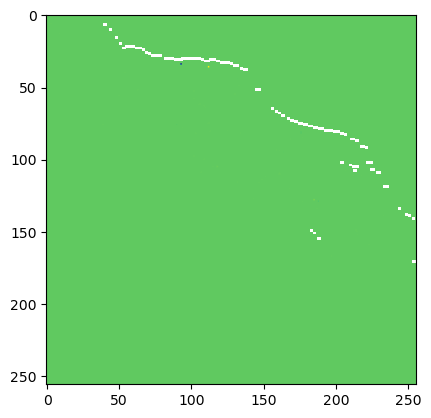

In [42]:
mat_x_aug[250][250], mat_y_aug[250][250]

(0.0, 0.0)

In [114]:
img = np.sqrt(np.square(mat_x_aug) + np.square(mat_y_aug))
img_new = np.stack((img, directions, np.zeros(mat_x_aug.shape)),-1)

In [115]:
img_new.shape

(256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 255.5, 255.5, -0.5)

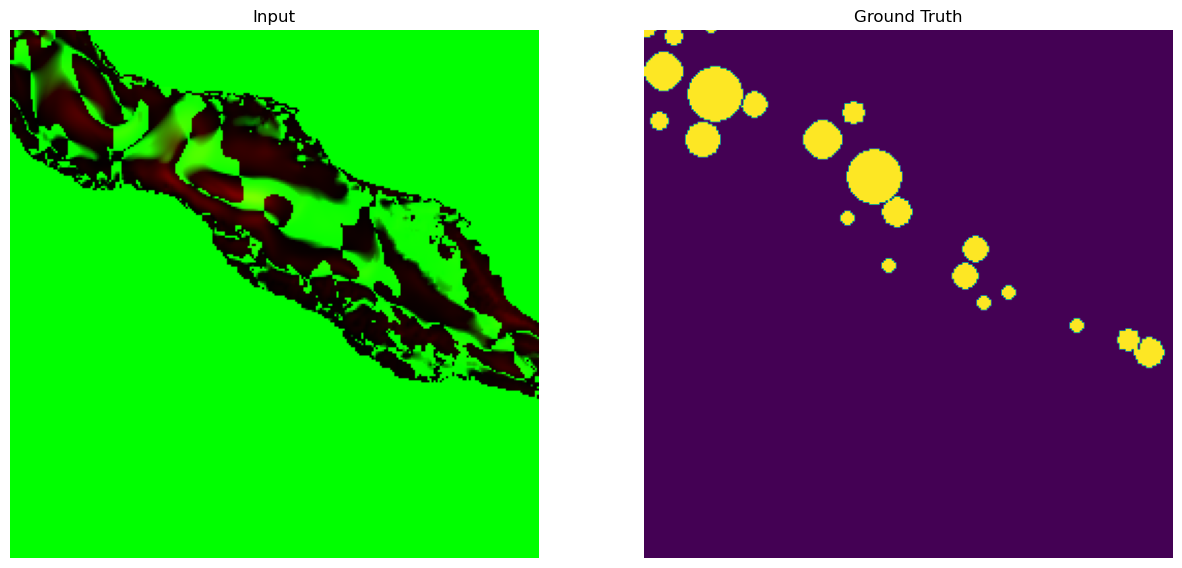

In [116]:
fig = plt.figure(figsize=(15, 10))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(img_new)
plt.title("Input")
plt.axis(False)
fig.add_subplot(rows, columns, 2)
plt.imshow(label_img_aug)
plt.title("Ground Truth")
plt.axis(False)

In [152]:
mat_X = mat_x_aug.flatten()
mat_X.shape
mat_Y = mat_y_aug.flatten()